# L6: Multi-agent Collaboration for Financial Analysis

In this lesson, you will learn ways for making agents collaborate with each other.

The libraries are already installed in the classroom. If you're running this notebook on your own machine, you can install the following:
```Python
!pip install crewai==0.28.8 crewai_tools==0.1.6 langchain_community==0.0.29
```

In [1]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

- Import libraries, APIs and LLM

In [2]:
from crewai import Agent, Task, Crew

**Note**: 
- The video uses `gpt-4-turbo`, but due to certain constraints, and in order to offer this course for free to everyone, the code you'll run here will use `gpt-3.5-turbo`.
- You can use `gpt-4-turbo` when you run the notebook _locally_ (using `gpt-4-turbo` will not work on the platform)
- Thank you for your understanding!

In [3]:
import os
from utils import get_openai_api_key, get_serper_api_key

openai_api_key = get_openai_api_key()
os.environ["OPENAI_MODEL_NAME"] = 'gpt-3.5-turbo'
os.environ["SERPER_API_KEY"] = get_serper_api_key()

## crewAI Tools

In [4]:
from crewai_tools import ScrapeWebsiteTool, SerperDevTool

search_tool = SerperDevTool()
scrape_tool = ScrapeWebsiteTool()

## Creating Agents

In [5]:
data_analyst_agent = Agent(
    role="Data Analyst",
    goal="Monitor and analyze market data in real-time "
         "to identify trends and predict market movements.",
    backstory="Specializing in financial markets, this agent "
              "uses statistical modeling and machine learning "
              "to provide crucial insights. With a knack for data, "
              "the Data Analyst Agent is the cornerstone for "
              "informing trading decisions.",
    verbose=True,
    allow_delegation=True,
    tools = [scrape_tool, search_tool]
)

In [6]:
trading_strategy_agent = Agent(
    role="Trading Strategy Developer",
    goal="Develop and test various trading strategies based "
         "on insights from the Data Analyst Agent.",
    backstory="Equipped with a deep understanding of financial "
              "markets and quantitative analysis, this agent "
              "devises and refines trading strategies. It evaluates "
              "the performance of different approaches to determine "
              "the most profitable and risk-averse options.",
    verbose=True,
    allow_delegation=True,
    tools = [scrape_tool, search_tool]
)

In [7]:
execution_agent = Agent(
    role="Trade Advisor",
    goal="Suggest optimal trade execution strategies "
         "based on approved trading strategies.",
    backstory="This agent specializes in analyzing the timing, price, "
              "and logistical details of potential trades. By evaluating "
              "these factors, it provides well-founded suggestions for "
              "when and how trades should be executed to maximize "
              "efficiency and adherence to strategy.",
    verbose=True,
    allow_delegation=True,
    tools = [scrape_tool, search_tool]
)

In [8]:
risk_management_agent = Agent(
    role="Risk Advisor",
    goal="Evaluate and provide insights on the risks "
         "associated with potential trading activities.",
    backstory="Armed with a deep understanding of risk assessment models "
              "and market dynamics, this agent scrutinizes the potential "
              "risks of proposed trades. It offers a detailed analysis of "
              "risk exposure and suggests safeguards to ensure that "
              "trading activities align with the firm’s risk tolerance.",
    verbose=True,
    allow_delegation=True,
    tools = [scrape_tool, search_tool]
)

## Creating Tasks

In [9]:
# Task for Data Analyst Agent: Analyze Market Data
data_analysis_task = Task(
    description=(
        "Continuously monitor and analyze market data for "
        "the selected stock ({stock_selection}). "
        "Use statistical modeling and machine learning to "
        "identify trends and predict market movements."
    ),
    expected_output=(
        "Insights and alerts about significant market "
        "opportunities or threats for {stock_selection}."
    ),
    agent=data_analyst_agent,
)

In [10]:
# Task for Trading Strategy Agent: Develop Trading Strategies
strategy_development_task = Task(
    description=(
        "Develop and refine trading strategies based on "
        "the insights from the Data Analyst and "
        "user-defined risk tolerance ({risk_tolerance}). "
        "Consider trading preferences ({trading_strategy_preference})."
    ),
    expected_output=(
        "A set of potential trading strategies for {stock_selection} "
        "that align with the user's risk tolerance."
    ),
    agent=trading_strategy_agent,
)


In [11]:
# Task for Trade Advisor Agent: Plan Trade Execution
execution_planning_task = Task(
    description=(
        "Analyze approved trading strategies to determine the "
        "best execution methods for {stock_selection}, "
        "considering current market conditions and optimal pricing."
    ),
    expected_output=(
        "Detailed execution plans suggesting how and when to "
        "execute trades for {stock_selection}."
    ),
    agent=execution_agent,
)


In [12]:
# Task for Risk Advisor Agent: Assess Trading Risks
risk_assessment_task = Task(
    description=(
        "Evaluate the risks associated with the proposed trading "
        "strategies and execution plans for {stock_selection}. "
        "Provide a detailed analysis of potential risks "
        "and suggest mitigation strategies."
    ),
    expected_output=(
        "A comprehensive risk analysis report detailing potential "
        "risks and mitigation recommendations for {stock_selection}."
    ),
    agent=risk_management_agent,
)

## Creating the Crew
- The `Process` class helps to delegate the workflow to the Agents (kind of like a Manager at work)
- In the example below, it will run this hierarchically.
- `manager_llm` lets you choose the "manager" LLM you want to use.

In [13]:
from crewai import Crew, Process
from langchain_openai import ChatOpenAI

# Define the crew with agents and tasks
financial_trading_crew = Crew(
    agents=[data_analyst_agent, 
            trading_strategy_agent, 
            execution_agent, 
            risk_management_agent],
    
    tasks=[data_analysis_task, 
           strategy_development_task, 
           execution_planning_task, 
           risk_assessment_task],
    
    manager_llm=ChatOpenAI(model="gpt-3.5-turbo", 
                           temperature=0.7),
    process=Process.hierarchical,
    verbose=True
)

## Running the Crew

- Set the inputs for the execution of the crew.

In [14]:
# Example data for kicking off the process
financial_trading_inputs = {
    'stock_selection': 'AAPL',
    'initial_capital': '100000',
    'risk_tolerance': 'Medium',
    'trading_strategy_preference': 'Day Trading',
    'news_impact_consideration': True
}

**Note**: LLMs can provide different outputs for they same input, so what you get might be different than what you see in the video.

In [15]:
### this execution will take some time to run
result = financial_trading_crew.kickoff(inputs=financial_trading_inputs)

 [DEBUG]: Working Agent: Crew Manager
 [INFO]: Starting Task: Continuously monitor and analyze market data for the selected stock (AAPL). Use statistical modeling and machine learning to identify trends and predict market movements.


> Entering new CrewAgentExecutor chain...
I need to ensure that the team is effectively monitoring and analyzing market data for AAPL to identify trends and predict market movements.

Action: Delegate work to co-worker
Action Input: {"coworker": "Data Analyst", "task": "Continuously monitor and analyze market data for AAPL", "context": "The goal is to use statistical modeling and machine learning to identify trends and predict market movements for AAPL. The team needs to provide insights and alerts about significant market opportunities or threats."}

> Entering new CrewAgentExecutor chain...
I need to gather real-time market data for AAPL to analyze trends and predict market movements accurately.

Action: Read website content
Action Input: {"website_url"

Final Answer: Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, Mac, iPad, and various subscription-based services. It operates platforms like the App Store and AppleCare support, serving consumers, small and mid-sized businesses, education, enterprise, and government markets. Apple Inc. was founded in 1976 and is headquartered in Cupertino, California.

> Finished chain.
 

Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, Mac, iPad, and various subscription-based services. It operates platforms like the App Store and AppleCare support, serving consumers, small and mid-sized businesses, education, enterprise, and government markets. Apple Inc. was founded in 1976 and is headquartered in Cupertino, California.


Action: Ask question to co-worker
Action Input: {"coworker": "Trading St

I need to gather as much information as possible to develop the best execution plans for AAPL trading strategies.

Action: Delegate work to co-worker
Action Input: 
{
"coworker": "Data Analyst",
"task": "Provide insights on AAPL market trends and movements for trading strategies development",
"context": "I am unable to gather the user's defined risk tolerance for AAPL trading strategies at this moment. I need insights on AAPL market trends and movements to develop trading strategies."
}

> Entering new CrewAgentExecutor chain...
I need to gather insights on AAPL market trends and movements to provide valuable information for developing trading strategies.

Action: Read website content
Action Input: {"website_url": "https://www.marketwatch.com/investing/stock/aapl"} 

marketwatch.comPlease enable JS and disable any ad blocker

Final Answer: marketwatch.comPlease enable JS and disable any ad blocker

> Finished chain.
 

marketwatch.comPlease enable JS and disable any ad blocker

The Dat

Final Answer: Page Not Found

Unfortunately, I was unable to access the necessary information on the proposed trading strategies and execution plans for AAPL. I will continue to search for alternative sources to gather the insights needed to evaluate risks and suggest mitigation strategies.

> Finished chain.
 

Page Not Found

Unfortunately, I was unable to access the necessary information on the proposed trading strategies and execution plans for AAPL. I will continue to search for alternative sources to gather the insights needed to evaluate risks and suggest mitigation strategies.

Thought: I need to find another way to gather the necessary information to complete the risk analysis report.

Action: Delegate work to co-worker
Action Input: 
{
  "coworker": "Trading Strategy Developer",
  "task": "Provide detailed insights on the proposed trading strategies and execution plans for AAPL",
  "context": "I need detailed information on the trading strategies and execution plans for AAPL 

Thought: I need to gather all the necessary information and insights from my team in order to provide a comprehensive risk analysis report for the proposed trading strategies and execution plans for AAPL.

Action: Delegate work to co-worker
Action Input: 
{
  "coworker": "Trading Strategy Developer",
  "task": "Provide detailed insights on the proposed trading strategies and execution plans for AAPL",
  "context": "I need detailed information on the trading strategies and execution plans for AAPL to evaluate the associated risks and suggest mitigation strategies."
} 

I tried reusing the same input, I must stop using this action input. I'll try something else instead.



Thought: I need to gather all the necessary information and insights from my team in order to provide a comprehensive risk analysis report for the proposed trading strategies and execution plans for AAPL.

Action: Ask question to co-worker
Action Input:
{
  "coworker": "Trading Strategy Developer",
  "question": "Can y

Final Answer: 

AAPL (Apple Inc.) Scalping: A Profitable Trading Strategy - Vestinda

By closely monitoring the buy and sell orders in the market, scalpers aim to profit from small price movements. This technique requires quick decision-making and execution to capitalize on short-term fluctuations in AAPL stock price.

$AAPL Trade Execution: Sticking to the Plan - YouTube

This video emphasizes the importance of sticking to a predetermined trade strategy for AAPL. It highlights the significance of selling contracts at key levels and maintaining discipline by holding onto a position until support breaks, all while avoiding emotional decision-making.

Apple Trading Strategies & Insights - LinkedIn

One popular strategy discussed here involves using a short position in a put option with a strike price below the current market price of AAPL shares. This approach can be used by traders to benefit from potential downward movements in the stock price.

AAPL Option Strategy Outcomes Around Ear

Final Answer: Page Not Found

> Finished chain.
 

Page Not Found

Action: Ask question to co-worker
Action Input:
{
  "coworker": "Risk Advisor",
  "question": "Can you please conduct a comprehensive risk analysis for the proposed trading strategies and execution plans for AAPL, and provide recommendations for risk mitigation strategies?",
  "context": "I have gathered detailed insights on the trading strategies and execution plans for AAPL. Your expertise is needed to evaluate the risks associated with these strategies and suggest mitigation strategies."
}

> Entering new CrewAgentExecutor chain...
I need to thoroughly analyze the trading strategies and execution plans for AAPL to identify potential risks and provide recommendations for risk mitigation strategies.

Action: Read website content
Action Input: {"website_url": "https://www.apple.com/investor/"} 

Attention Required! | Cloudflare
Please enable cookies.
Sorry, you have been blocked
You are unable to access web.prd.q4inc.co

Thought: I now can give a great answer
Final Answer: After searching the internet for information on the proposed trading strategies and execution plans for AAPL, here are the key insights and potential risks associated with the strategies:

1. Manual AAPL scalping involves traders personally executing trades based on their analysis and intuition, requiring constant monitoring. This strategy can be risky due to the high level of involvement and potential for human error.

2. Algorithmic trading tools are used for AAPL trading strategies to analyze data, identify patterns, and execute trades swiftly. While this can be efficient, there is a risk of technical glitches or errors in the algorithm leading to unexpected outcomes.

3. Using a short position in a put option with a strike price below the current market price of AAPL shares is a popular strategy. However, options trading carries inherent risks such as time decay and volatility.

4. Backtesting bullish options strategies for AAPL,

- Display the final result as Markdown.

In [16]:
from IPython.display import Markdown
Markdown(result)

Risk Analysis Report for AAPL Trading Strategies and Execution Plans:

After gathering insights from various sources on the proposed trading strategies and execution plans for AAPL, here is a comprehensive risk analysis along with recommendations for risk mitigation strategies:

1. Manual AAPL scalping: This strategy involves traders personally executing trades based on analysis and intuition, requiring constant monitoring. Risks include human error and high involvement. Mitigation: Implement strict trade execution rules and risk management practices to reduce errors.

2. Algorithmic trading for AAPL: Tools are used to analyze data, identify patterns, and execute trades swiftly. Risks involve technical glitches and unexpected outcomes. Mitigation: Regularly monitor algorithm performance and have contingency plans in place for technical failures.

3. Short position in put option strategy: Popular but carries risks like time decay and volatility. Mitigation: Utilize risk management tools like stop-loss orders and position sizing to control downside risk.

4. Backtesting bullish options strategies: Can provide benefits, but market conditions impact effectiveness. Risks include market fluctuations. Mitigation: Diversify options portfolio and adjust strategies based on market trends.

5. Options trading around earnings for AAPL: Requires careful consideration of best performing strategies. Risks include volatility during earnings announcements. Mitigation: Use risk-reducing strategies like hedging and diversification.

6. Simple option buying strategies: Offer flexibility but expose to market risks. Risks include market fluctuations. Mitigation: Monitor market conditions closely and adjust strategies accordingly.

7. Algo trading strategies for AAPL: Reshaping trading dynamics with data-driven approach. Risks include rapid market changes. Mitigation: Combine algorithmic trading with human oversight to adapt to changing market conditions.

In conclusion, the proposed trading strategies for AAPL involve a mix of manual, algorithmic, and options trading approaches, each carrying specific risks. To mitigate these risks, it is crucial to have clear risk management protocols in place, including setting stop-loss orders, diversifying the portfolio, and staying informed about market developments. Regular monitoring and adjustment of the trading strategies based on market conditions can help reduce potential risks associated with AAPL trading activities.

# 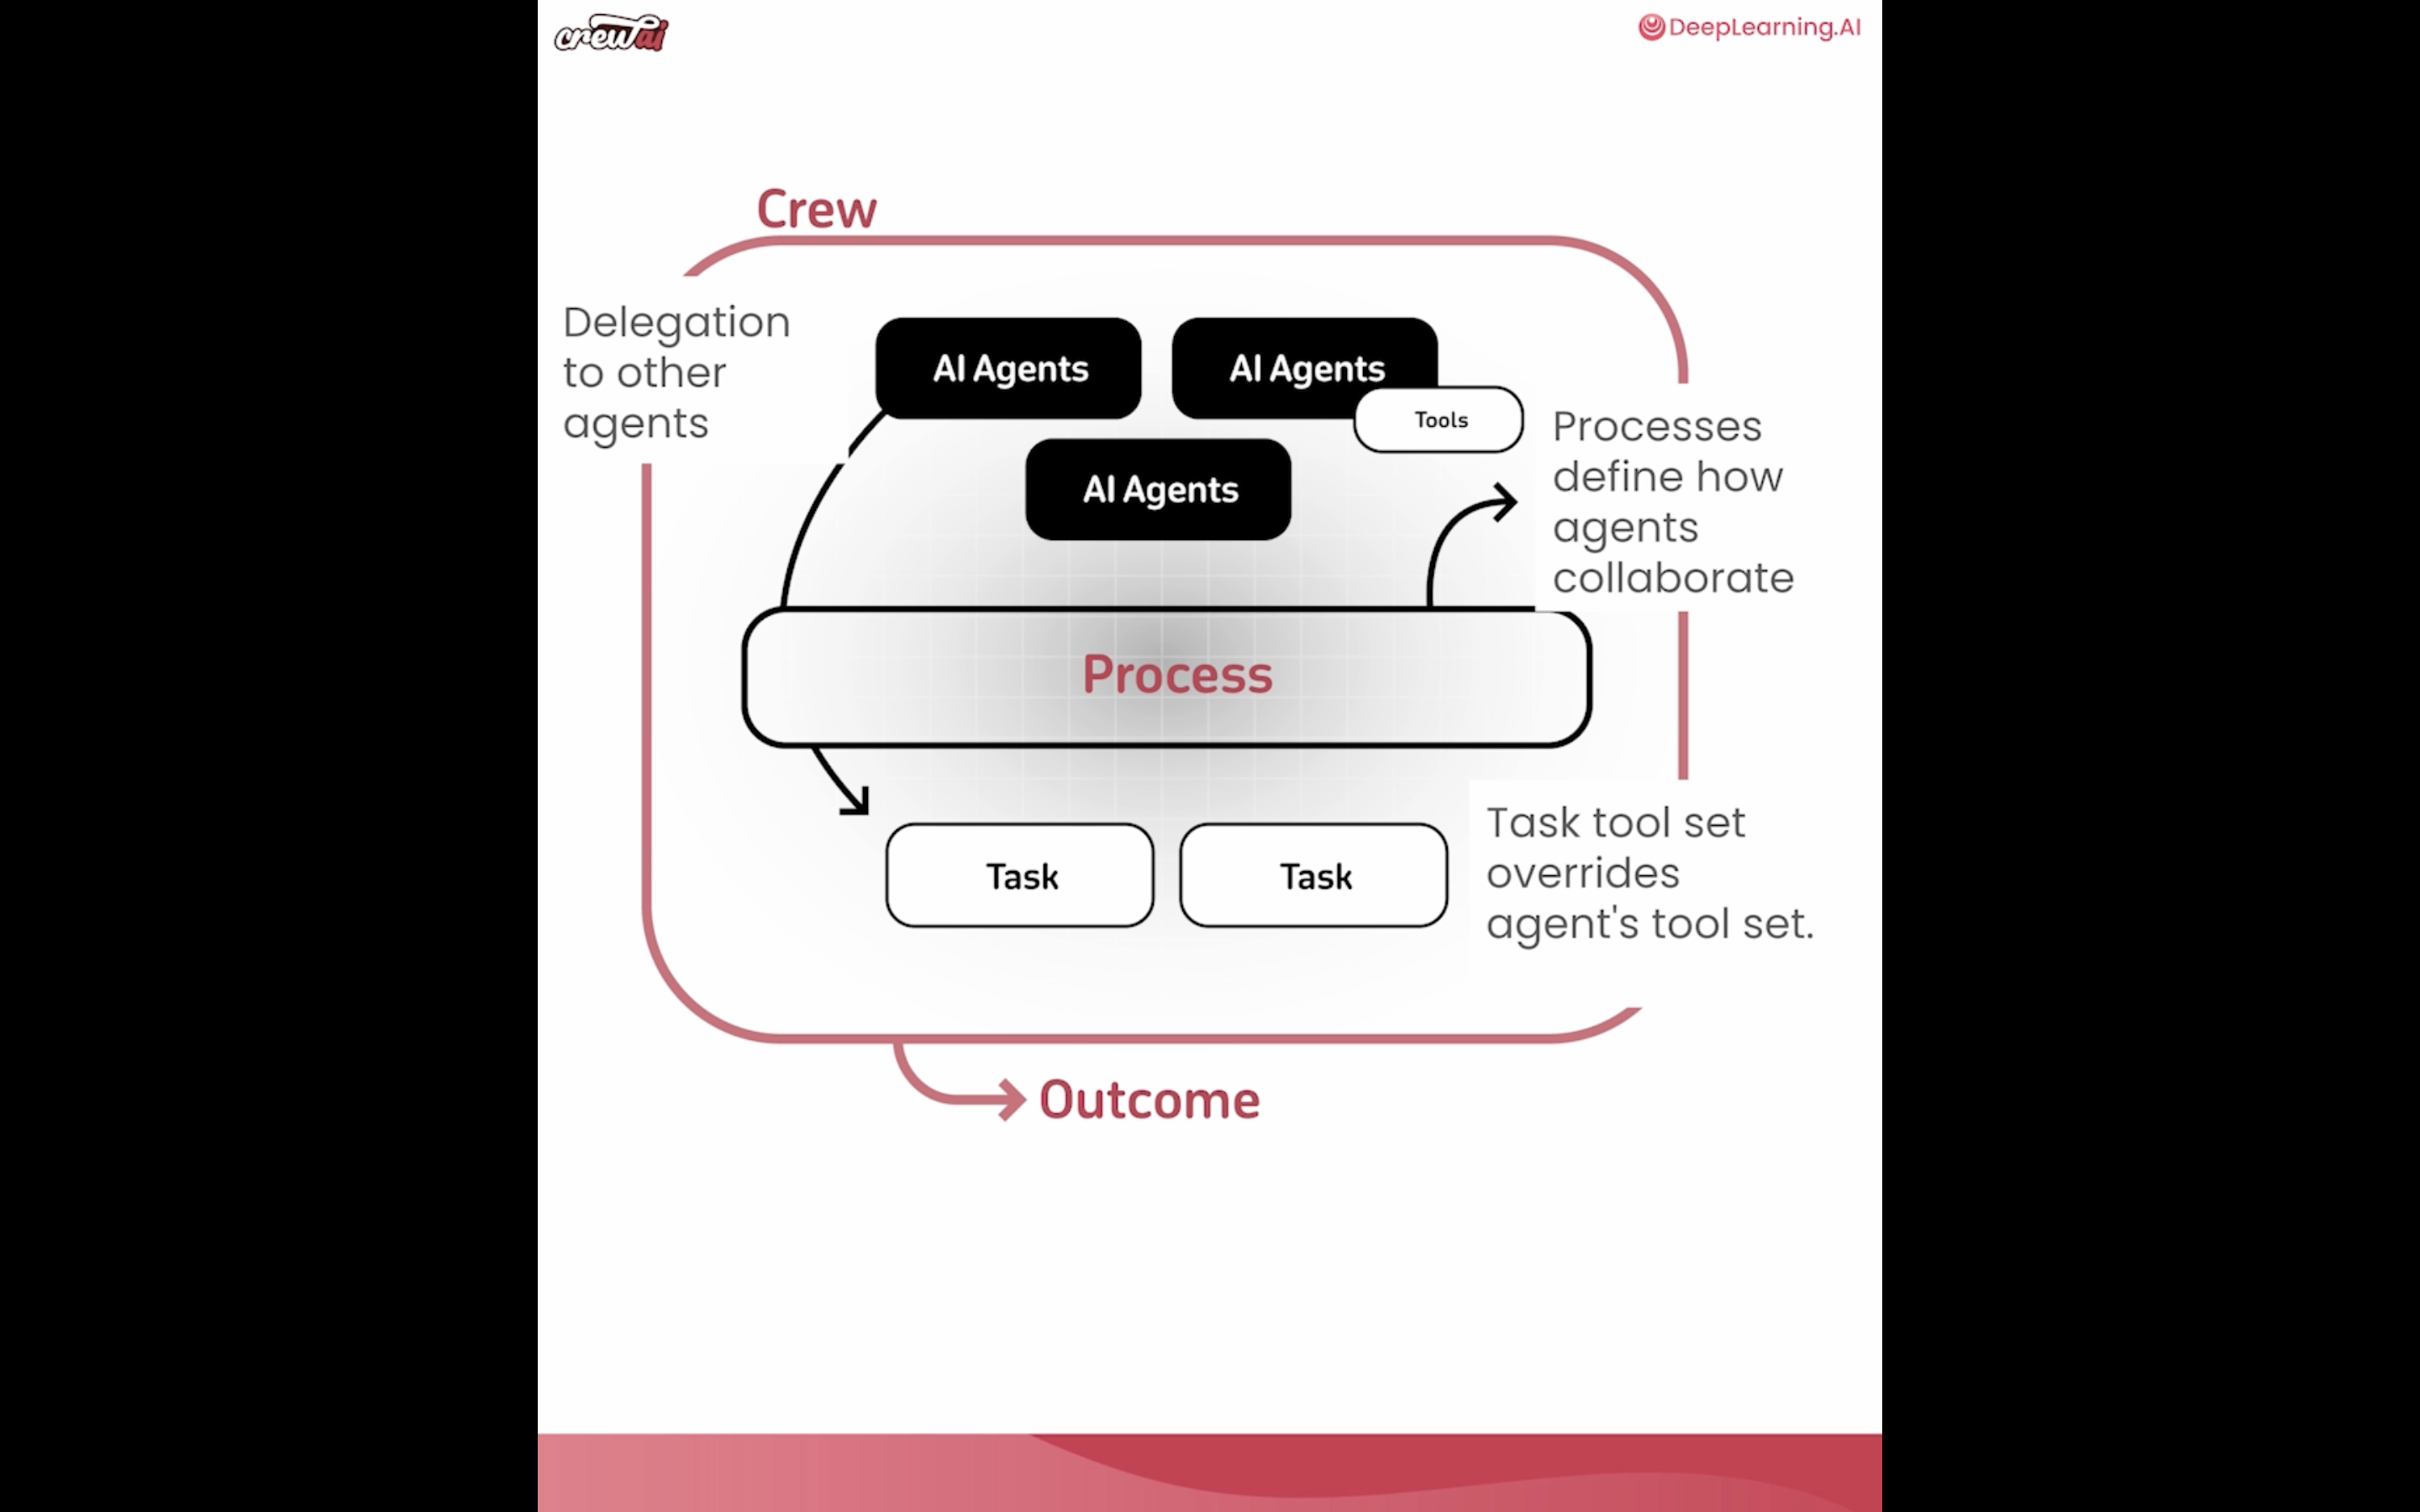
